In [1]:
import os          
import cv2
import netron
import visualkeras
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from matplotlib import pyplot
from datetime import datetime      
import matplotlib.pyplot as plt 
from ann_visualizer.visualize import ann_viz;
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection

%load_ext tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [3]:
def load_data(dataset):
    class_names = []
    images = []
    labels = []  
    for folder in os.listdir(dataset):
        class_names.append(folder)    
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 
    print("Loading Dataset {}".format(dataset))
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (150, 150)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(label)
    return images, labels , class_names

In [4]:
dataset = "C:/Users/Karnan/Downloads/dataset/leaves"
images, labels, class_names = load_data(dataset)

Loading Dataset C:/Users/Karnan/Downloads/dataset/leaves


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 50.68it/s]


In [5]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 

In [6]:
images = images/255.0

In [8]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_images, train_labels, batch_size=128, epochs = 50, validation_split = 0.2,callbacks=[tensorboard_callback])

Epoch 1/50
10/10 [==============================] - 3s 197ms/step - loss: 3.3247 - accuracy: 0.0698 - val_loss: 3.1823 - val_accuracy: 0.0748
Epoch 2/50
10/10 [==============================] - 0s 50ms/step - loss: 2.7443 - accuracy: 0.2419 - val_loss: 2.4526 - val_accuracy: 0.3265
Epoch 3/50
10/10 [==============================] - 1s 53ms/step - loss: 2.0131 - accuracy: 0.4233 - val_loss: 1.7787 - val_accuracy: 0.4762
Epoch 4/50
10/10 [==============================] - 1s 52ms/step - loss: 1.4434 - accuracy: 0.5818 - val_loss: 1.5597 - val_accuracy: 0.5748
Epoch 5/50
10/10 [==============================] - 1s 53ms/step - loss: 1.1824 - accuracy: 0.6491 - val_loss: 1.2565 - val_accuracy: 0.6224
Epoch 6/50
10/10 [==============================] - 1s 51ms/step - loss: 0.9274 - accuracy: 0.7181 - val_loss: 1.1310 - val_accuracy: 0.6701
Epoch 7/50
10/10 [==============================] - 1s 55ms/step - loss: 0.8459 - accuracy: 0.7419 - val_loss: 1.0438 - val_accuracy: 0.6973
Epoch 8/50
1

In [20]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 7ms/step - loss: 1.2000 - accuracy: 0.8202


[1.2000305652618408, 0.8201634883880615]

In [22]:
def plot_accuracy_loss(history):
    y = ['accuracy','loss']
    for x in y:
        plt.plot(history.history[x],color='orange', label = x )
        plt.plot(history.history['val_'+x], color='lime', label ='val_'+x)
        plt.title("train_"+x + " vs val_"+x)
        plt.ylabel(x)
        plt.xlabel("epochs")
        plt.legend()
        plt.show()

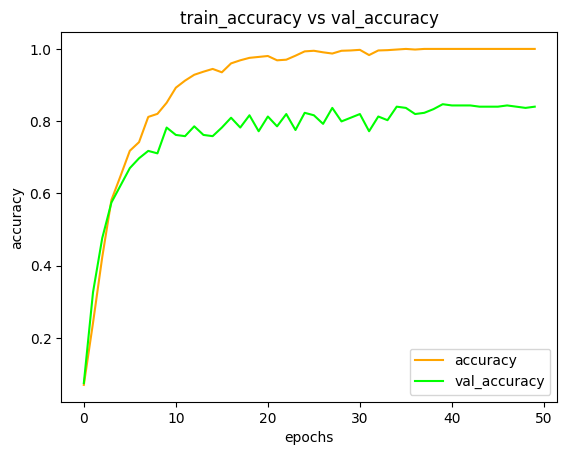

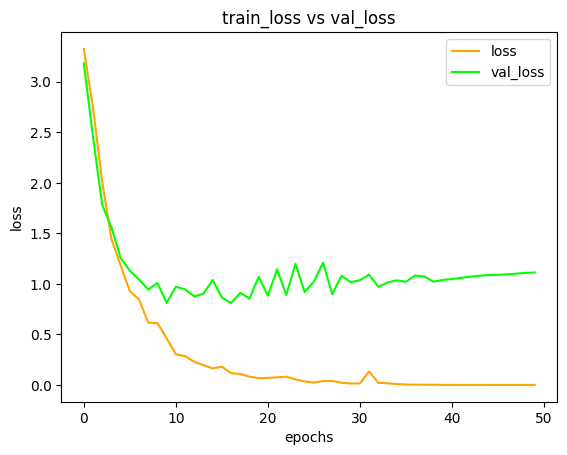

In [23]:
plot_accuracy_loss(history)

In [33]:
print(TN)

Arive-Dantu               -7.0
Basale                    -4.0
Betel                     -3.0
Crape_Jasmine              0.0
Curry                     -6.0
Drumstick                 -2.0
Fenugreek                 -2.0
Guava                     -1.0
Hibiscus                   0.0
Indian_Beech              -2.0
Indian_Mustard            -1.0
Jackfruit                 -1.0
Jamaica_Cherry-Gasagase   -1.0
Jamun                      0.0
Jasmine                   -2.0
Karanda                    0.0
Lemon                     -2.0
Mango                     -5.0
Mexican_Mint              -2.0
Mint                      -2.0
Neem                      -6.0
Oleander                   0.0
Parijata                  -4.0
Peepal                     0.0
Pomegranate               -5.0
Rasna                     -1.0
Rose_apple                -2.0
Roxburgh_fig              -1.0
Sandalwood                 0.0
Tulsi                     -4.0
dtype: float64


In [32]:
Accuracy = []
Error_rate = []
Precision = []
Recall = []
F_measure = []

predictions = np.argmax(model.predict(test_images), axis = 1)
actual = test_labels

cnf_matrix = pd.DataFrame(confusion_matrix(actual,predictions),index = class_names, columns =class_names)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)


print(TN)

accuracy = (TP + TN) / (TP + FP + FN + TN)
error_rate = (FP + FN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN )
f_measure = (2 * recall * precision) / (recall + precision)
        
Accuracy.append(accuracy)
Error_rate.append(error_rate)
Precision.append(precision)
Recall.append(recall)
F_measure.append(f_measure)
        
measures = pd.DataFrame()
measures['class_name'] = class_names
measures['TP'] = TP
measures['FP'] = FP
measures['TN'] = TN
measures['FN'] = FN
measures['Accuracy'] = Accuracy
measures['Error_rate'] = Error_rate
measures['Precision'] = Precision
measures['Recall'] = Recall
measures['F_measure'] = F_measure
plt.figure(figsize=(15,15))
sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
    

Arive-Dantu               -7.0
Basale                    -4.0
Betel                     -3.0
Crape_Jasmine              0.0
Curry                     -6.0
Drumstick                 -2.0
Fenugreek                 -2.0
Guava                     -1.0
Hibiscus                   0.0
Indian_Beech              -2.0
Indian_Mustard            -1.0
Jackfruit                 -1.0
Jamaica_Cherry-Gasagase   -1.0
Jamun                      0.0
Jasmine                   -2.0
Karanda                    0.0
Lemon                     -2.0
Mango                     -5.0
Mexican_Mint              -2.0
Mint                      -2.0
Neem                      -6.0
Oleander                   0.0
Parijata                  -4.0
Peepal                     0.0
Pomegranate               -5.0
Rasna                     -1.0
Rose_apple                -2.0
Roxburgh_fig              -1.0
Sandalwood                 0.0
Tulsi                     -4.0
dtype: float64


ValueError: Length of values (1) does not match length of index (30)

In [24]:
def measures(y_actual, y_pred):
    TP = []
    FP = []
    TN = []
    FN = []
    Accuracy = []
    Error_rate = []
    Precision = []
    Recall = []
    F_measure = []
    for i in range(len(class_names)):
        
        tp = 0
        fp = 0
        tn = 0
        fn = 0

        for i in range(len(y_pred)): 
            if y_actual[i]==y_pred[i]:
                tp += 1
            if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
                fp += 1
            if y_actual[i]==y_pred[i]==0:
                tn += 1
            if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
                fn += 1
                
        TP.append(tp)
        FP.append(fp)
        TN.append(tn)
        FN.append(fn)
            
        accuracy = (tp + tn) / (tp + fp + fn + tn)
        error_rate = (fp + fn) / (tp + fp + fn + tn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn )
        f_measure = (2 * recall * precision) / (recall + precision)
        
        Accuracy.append(accuracy)
        Error_rate.append(error_rate)
        Precision.append(precision)
        Recall.append(recall)
        F_measure.append(f_measure)
        
    
        
    measures = pd.DataFrame()
    measures['class_name'] = class_names
    measures['TP'] = TP
    measures['FP'] = FP
    measures['TN'] = TN
    measures['FN'] = FN
    measures['Accuracy'] = Accuracy
    measures['Error_rate'] = Error_rate
    measures['Precision'] = Precision
    measures['Recall'] = Recall
    measures['F_measure'] = F_measure
    print(measures)
    
    confusion_matrix_df = pd.DataFrame(confusion_matrix(actual,predictions),index = class_names, columns =class_names)
    plt.figure(figsize=(15,15))
    sns.heatmap(confusion_matrix_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

                 class_name  TP  FP  TN  FN  Accuracy  Error_rate  Precision  \
0               Arive-Dantu  22   4  16   4  0.826087    0.173913   0.846154   
1                    Basale  22   4  16   4  0.826087    0.173913   0.846154   
2                     Betel  22   4  16   4  0.826087    0.173913   0.846154   
3             Crape_Jasmine  22   4  16   4  0.826087    0.173913   0.846154   
4                     Curry  22   4  16   4  0.826087    0.173913   0.846154   
5                 Drumstick  22   4  16   4  0.826087    0.173913   0.846154   
6                 Fenugreek  22   4  16   4  0.826087    0.173913   0.846154   
7                     Guava  22   4  16   4  0.826087    0.173913   0.846154   
8                  Hibiscus  22   4  16   4  0.826087    0.173913   0.846154   
9              Indian_Beech  22   4  16   4  0.826087    0.173913   0.846154   
10           Indian_Mustard  22   4  16   4  0.826087    0.173913   0.846154   
11                Jackfruit  22   4  16 

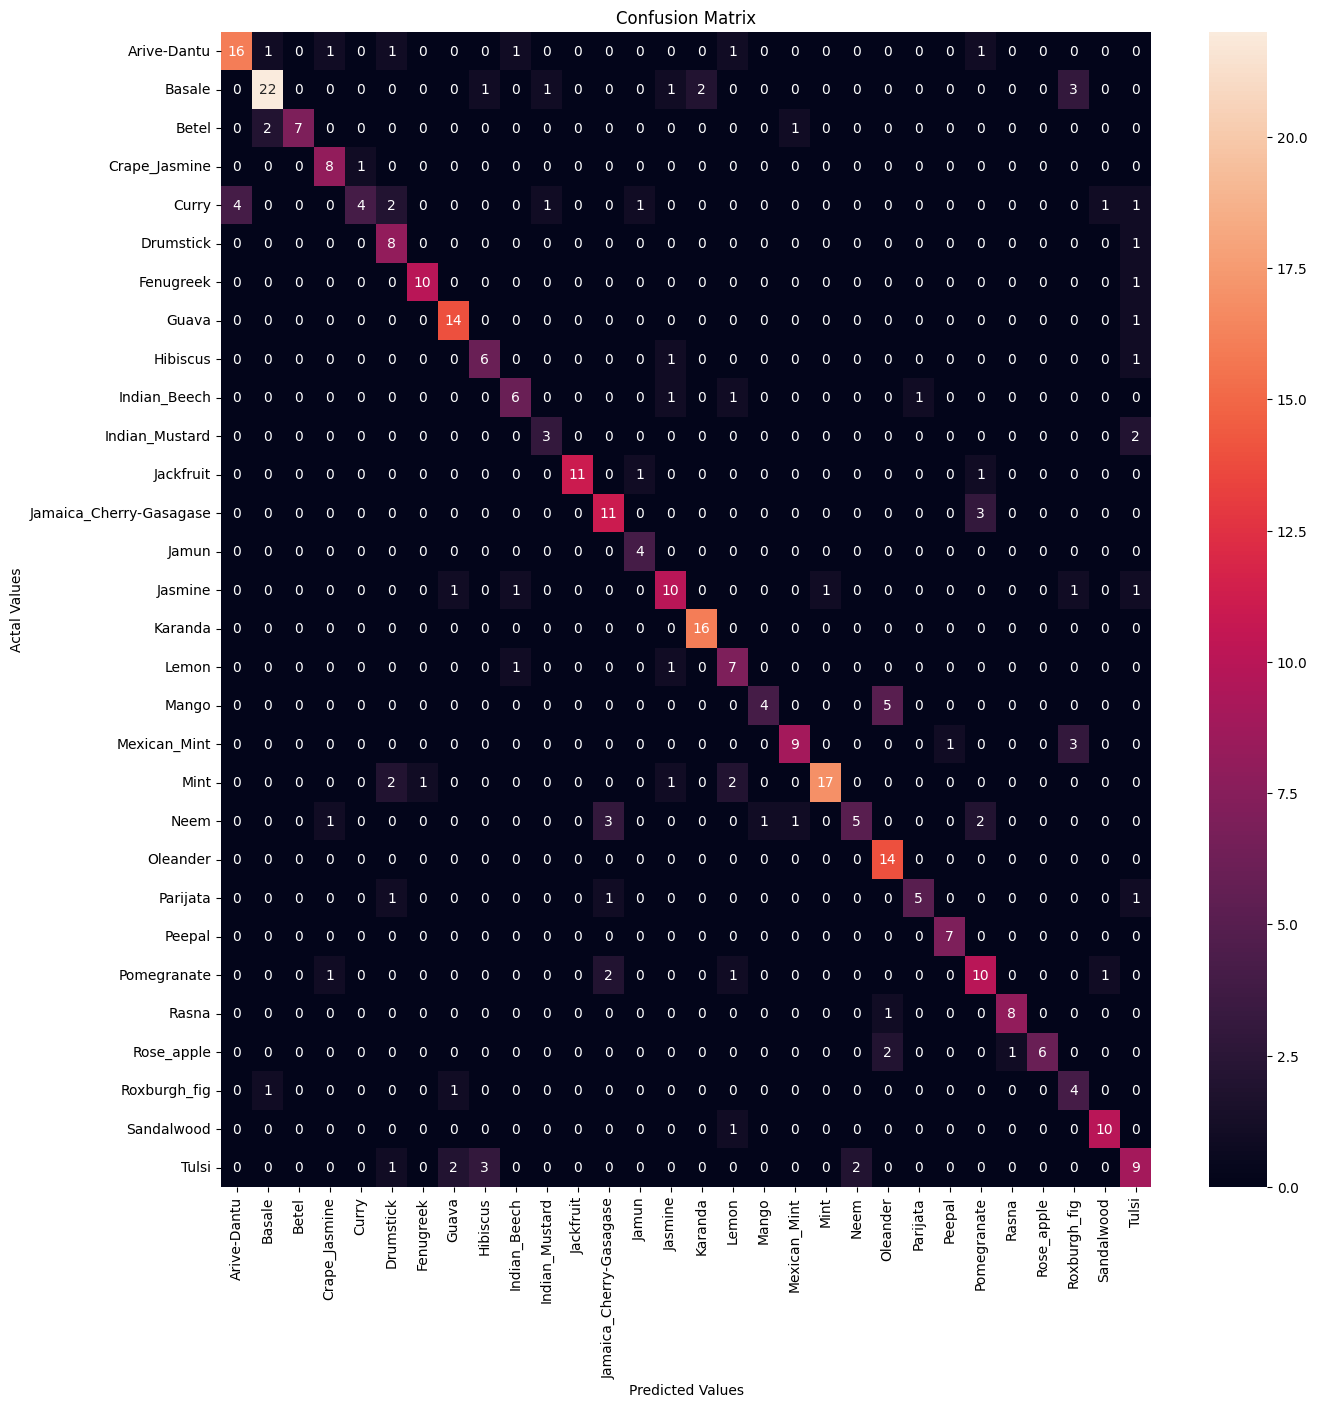

In [16]:
predictions = np.argmax(model.predict(test_images), axis = 1)
actual = test_labels
measures(actual, predictions)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        1

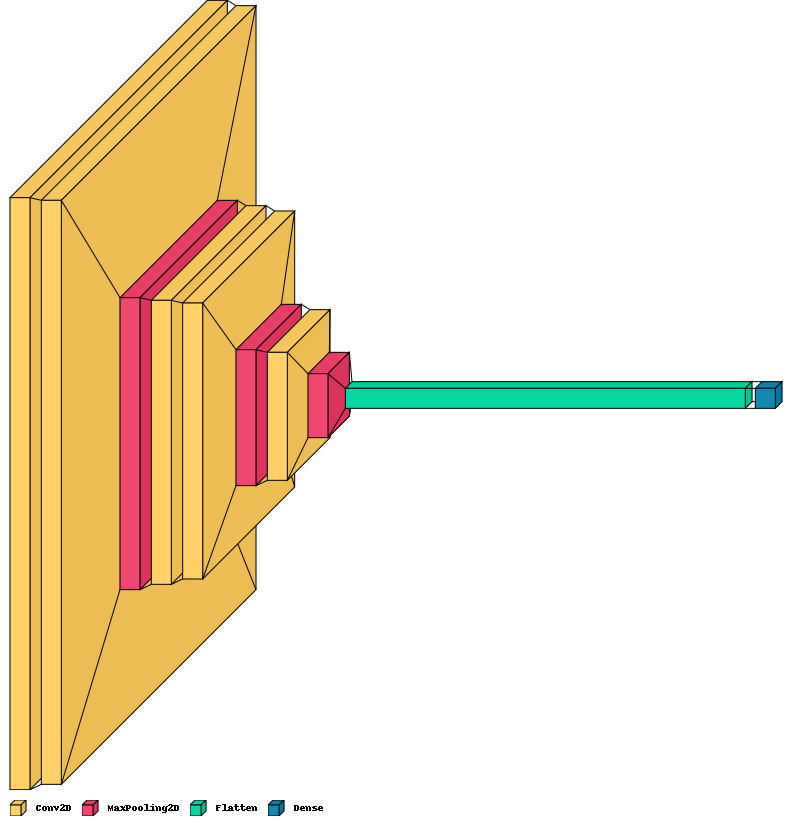

In [18]:
visualkeras.layered_view(model, legend=True) 

In [29]:
dot_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [28]:
pip install pydot


  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir} --port=8008

In [21]:
!kill 14760

'kill' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
ann_viz(model, title="RRNET8")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
model_name = 'RRNET8.h5'
model.save(model_name)
netron.start(model_name, 8081)

In [ ]:
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

In [ ]:
weights = model.get_layer("conv2d_5").get_weights()[1]
plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(weights)), y=weights)
plt.show()

In [ ]:
bias = model.get_layer("dense_1").get_weights()[1]
plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(bias)), y=bias)
plt.show()

In [ ]:
weights = model.get_layer('dense_1').get_weights()[0]
sns.distplot(weights)
plt.show()

In [ ]:
feature_maps = tf.keras.models.Model(model.input, model.get_layer('conv2d_5').output)
feature_maps.summary()

In [ ]:
filters , bias = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters =6
ix=1
fig = pyplot.figure(figsize=(20,15))
for i in range(n_filters):
    
    f = filters[:,:,:,i]
    for j in range(3):
       
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1

pyplot.show()

In [ ]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

In [ ]:
blocks = [ 0, 1 ,3 ,4, 6]
outputs = [model.layers[i].output for i in blocks]

model = tf.keras.models.Model( inputs= model.inputs, outputs = outputs)

In [ ]:
feature_map = model.predict(image)

for i,fmap in zip(blocks,feature_map):
    fig = pyplot.figure(figsize=(20,15))
    fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

In [25]:
# program to find tp tn ..


FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

NameError: name 'cnf_matrix' is not defined

In [ ]:
# other works 
## dipalying the feature map on every layer
## need to choose the dataset